In [15]:
'''
Source

Examples on Scikit Website
Google :)

Inspiration

https://github.com/mirjalil/pyclust/blob/master/examples/compare_kernelKmenas_vs_kmeans.ipynb
http://programtalk.com/vs2/python/8517/pyclust/tests/test_kernel_kmeans.py/
'''

import numpy as np
import scipy
import pandas
import treelib
import pyclust
import pandas

import matplotlib
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import sklearn.datasets

# an example of clustering by BIRCH algorithm and OPTICS algorithm
# on a sample data set provided by the pyclustering library



%matplotlib inline

clustering_names = [
    'SpectralClustering', 'AgglomerativeClustering',
    'DBSCAN', 'Birch']

np.random.seed(0)

In [16]:
'''
Define a helper function to create scatter plots for various data types
'''

'\nDefine a helper function to create scatter plots for various data types\n'

In [17]:
def plot_scatter(X, labels1=None, labels2=None, titles=["Scatter Plot", None]):
    
    labels1 = np.zeros(shape=X.shape[0], dtype=int) if labels1 is None else labels1
    
    colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
    colors = np.hstack([colors] * 20)
    col_dict = {}
    
    for i,lab in enumerate(np.unique(labels1)):
        col_dict[lab] = colors[i]
        
    
    if labels2 is None:
        fig = plt.figure(1, figsize=(8,6))
        ax1 = fig.add_subplot(1, 1, 1)
    else:
        fig = plt.figure(1, figsize=(12,6))
        ax1 = fig.add_subplot(1, 2, 1)

    for i in np.unique(labels1):
        indx = np.where(labels1 == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.3)

    plt.setp(ax1.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax1.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(titles[0], size=20)

    
    if labels2 is not None:
        ax2 = fig.add_subplot(1, 2, 2)
        for i in np.unique(labels2):
            indx = np.where(labels2 == i)[0]
            plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.3)

        plt.setp(ax1.get_xticklabels(), rotation='horizontal', fontsize=16)
        plt.setp(ax1.get_yticklabels(), rotation='vertical', fontsize=16)

        plt.xlabel('$x_1$', size=20)
        plt.ylabel('$x_2$', size=20)
        plt.title(titles[1], size=20)
        
    plt.show()

In [18]:
## Noisy circles
n_samples = 5000
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)

print(len(noisy_circles))
Xcircles = np.array(noisy_circles[0])
print(Xcircles.shape)

2
(5000, 2)


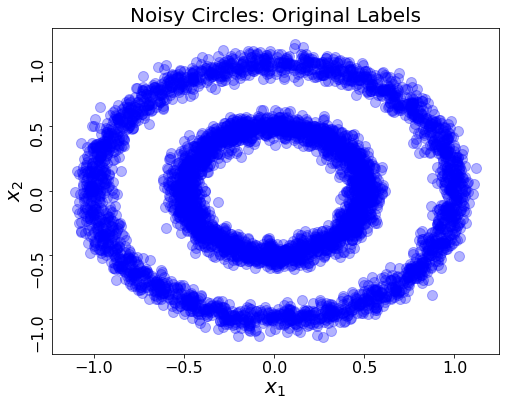

In [19]:
plot_scatter(Xcircles, labels1=None, titles=["Noisy Circles: Original Labels"])
    
## test plot original data
#X = np.array(noisy_circles)


In [20]:
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
print(len(noisy_circles))
Yblobs = np.array(blobs[0])
print(Yblobs.shape)

2
(5000, 2)


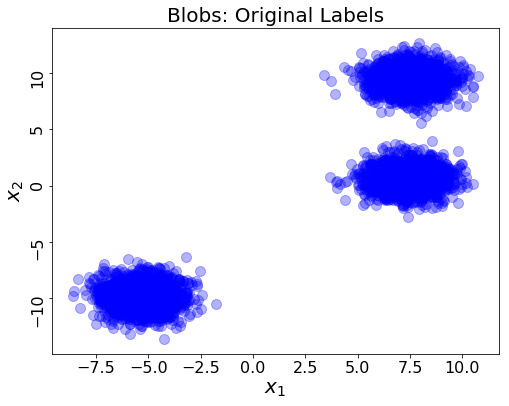

In [21]:
plot_scatter(Yblobs, labels1=None, titles=["Blobs: Original Labels"])

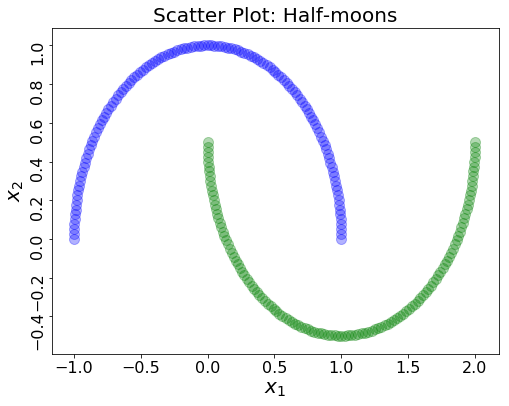

In [22]:
#example moon plots


X_moon,y_moon = datasets.make_moons(n_samples=250, shuffle=True, noise=None, random_state=None)

plot_scatter(X_moon, labels1=y_moon, titles=["Scatter Plot: Half-moons"])

In [23]:
no_structure = np.random.rand(n_samples, 2), None

print(len(no_structure))
Yno_structure = np.array(no_structure[0])
print(Yno_structure.shape)


2
(5000, 2)


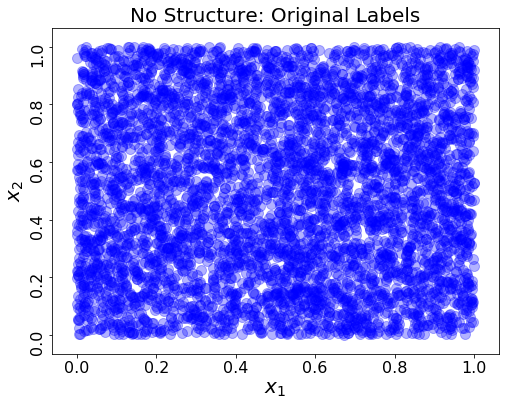

In [24]:
plot_scatter(Yno_structure, labels1=None, titles=["No Structure: Original Labels"])

In [25]:
print("Initialize and perform clustering algorithms")




Initialize and perform clustering algorithms


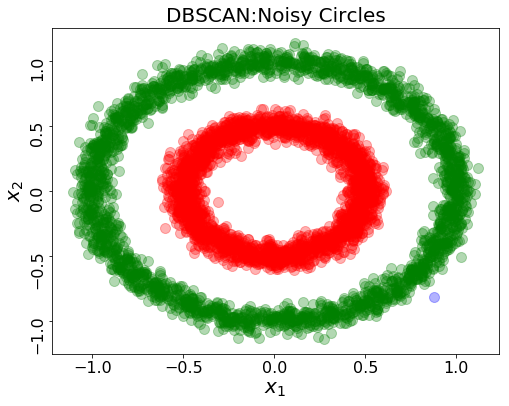

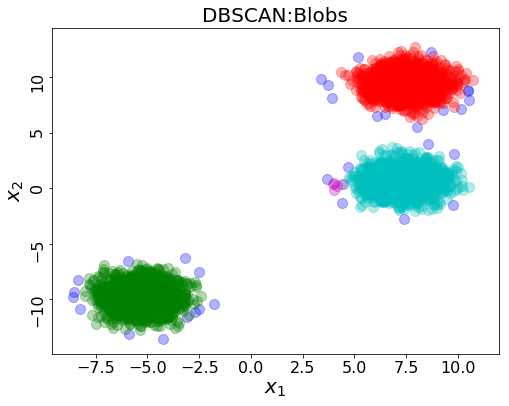

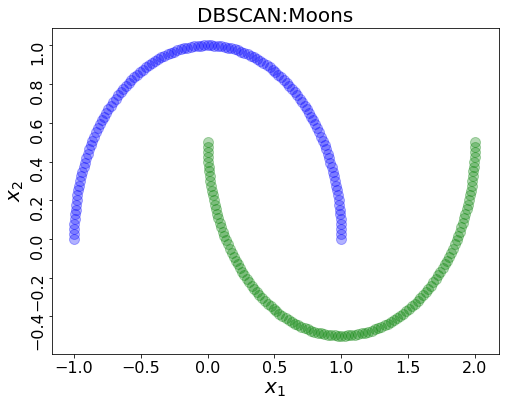

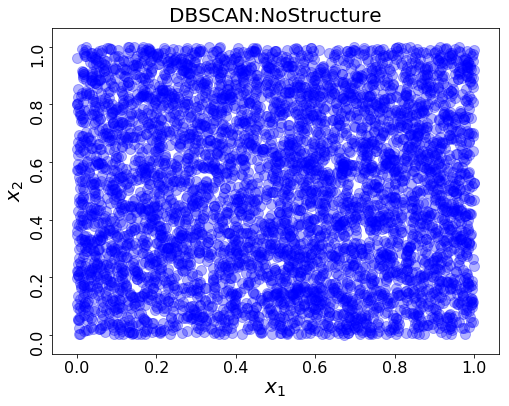

In [26]:
## Performing DBSCAN 
#Initialize DBSCAN algorithm

dbscan = cluster.DBSCAN(eps=.1)

dbscan.fit(Xcircles)

y_predict = dbscan.labels_.astype(np.int)

dbscan = cluster.DBSCAN(eps=.5)
dbscan.fit(Yblobs)
yblob_predict = dbscan.labels_.astype(np.int)

dbscan = cluster.DBSCAN(eps=.1)
dbscan.fit(X_moon)
ymoon_predict =  dbscan.labels_.astype(np.int)

dbscan = cluster.DBSCAN(eps=50)
dbscan.fit(Yno_structure)
ynostruct_predict =  dbscan.labels_.astype(np.int)

plot_scatter(Xcircles, labels1=y_predict, titles=["DBSCAN:Noisy Circles"])
plot_scatter(Yblobs, labels1=yblob_predict, titles=["DBSCAN:Blobs"])
plot_scatter(X_moon, labels1=ymoon_predict, titles=["DBSCAN:Moons"])
plot_scatter(Yno_structure, labels1=ynostruct_predict, titles=["DBSCAN:NoStructure"])





/Users/ashishkumar/anaconda/lib/python3.6/site-packages/sklearn/cluster/birch.py:602: UserWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters))


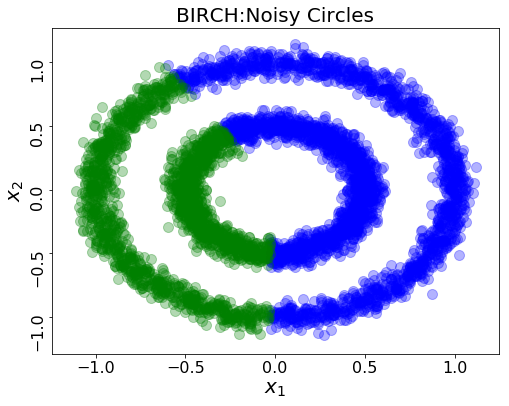

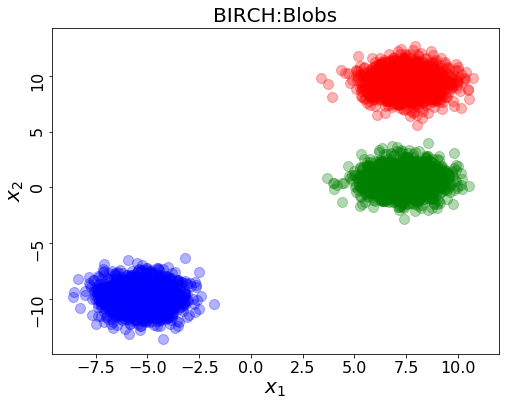

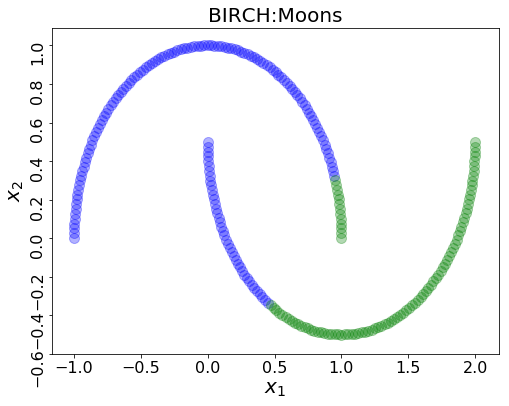

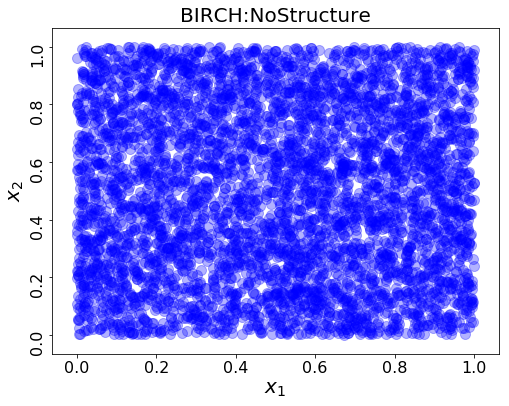

In [27]:
## Performing BIRCH

#Initialize BIRCH Alogorithm
birch = cluster.Birch(n_clusters=2)
birch.fit(Xcircles)

y_predict = birch.labels_.astype(np.int)

birch = cluster.Birch(n_clusters=3)
birch.fit(Yblobs)
yblob_predict = birch.labels_.astype(np.int)

birch = cluster.Birch(n_clusters=2)
birch.fit(X_moon)
ymoon_predict =  birch.labels_.astype(np.int)

birch = cluster.Birch(n_clusters=2)
birch.fit(Yno_structure)
ynostruct_predict =  dbscan.labels_.astype(np.int)

plot_scatter(Xcircles, labels1=y_predict, titles=["BIRCH:Noisy Circles"])
plot_scatter(Yblobs, labels1=yblob_predict, titles=["BIRCH:Blobs"])
plot_scatter(X_moon, labels1=ymoon_predict, titles=["BIRCH:Moons"])
plot_scatter(Yno_structure, labels1=ynostruct_predict, titles=["BIRCH:NoStructure"])

/Users/ashishkumar/anaconda/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/Users/ashishkumar/anaconda/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/Users/ashishkumar/anaconda/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 230 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


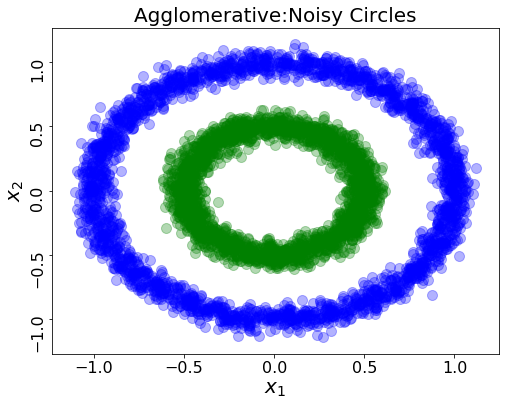

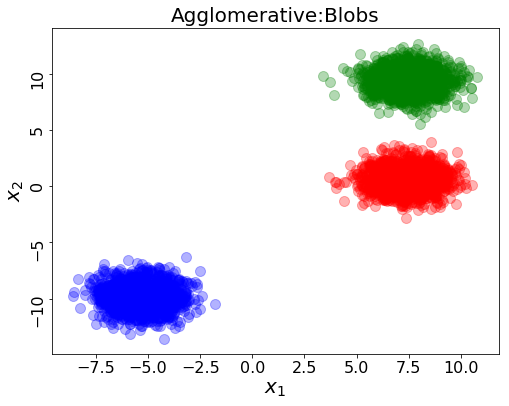

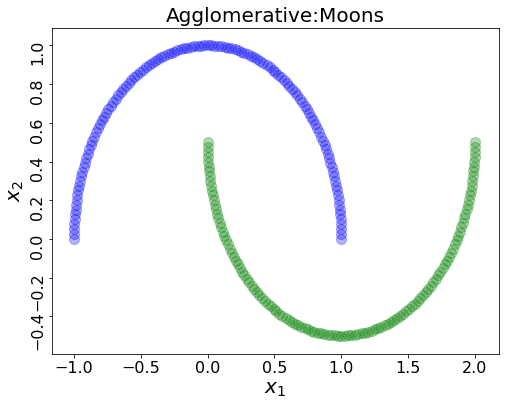

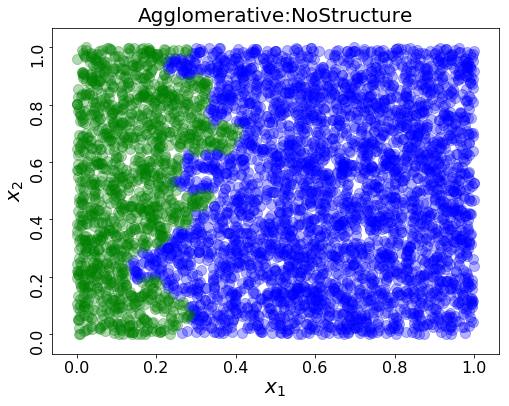

In [28]:

#Initialize Agglomerative clustering
connectivity = kneighbors_graph(Xcircles, n_neighbors=15, include_self=False)
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

## Performing Agglomerative

average_linkage.fit(Xcircles)

y_predict = average_linkage.labels_.astype(np.int)

connectivity = kneighbors_graph(Yblobs, n_neighbors=5, include_self=False)
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=3,
        connectivity=connectivity)

average_linkage.fit(Yblobs)
yblob_predict = average_linkage.labels_.astype(np.int)

connectivity = kneighbors_graph(X_moon, n_neighbors=5, include_self=False)
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

average_linkage.fit(X_moon)
ymoon_predict =  average_linkage.labels_.astype(np.int)

connectivity = kneighbors_graph(Yno_structure, n_neighbors=2, include_self=False)
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock", n_clusters=2,
        connectivity=connectivity)

average_linkage.fit(Yno_structure)
ynostruct_predict =  average_linkage.labels_.astype(np.int)

plot_scatter(Xcircles, labels1=y_predict, titles=["Agglomerative:Noisy Circles"])
plot_scatter(Yblobs, labels1=yblob_predict, titles=["Agglomerative:Blobs"])
plot_scatter(X_moon, labels1=ymoon_predict, titles=["Agglomerative:Moons"])
plot_scatter(Yno_structure, labels1=ynostruct_predict, titles=["Agglomerative:NoStructure"])

/Users/ashishkumar/anaconda/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


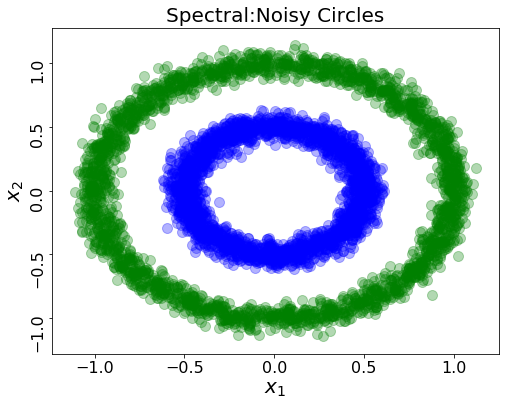

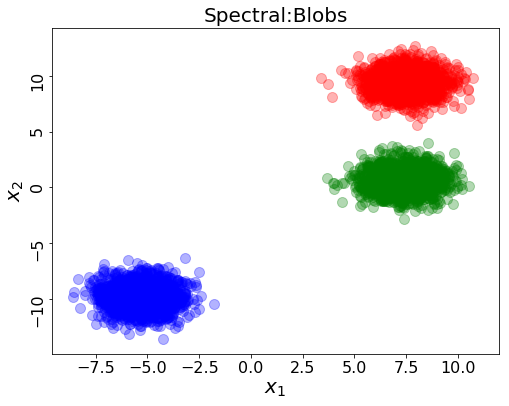

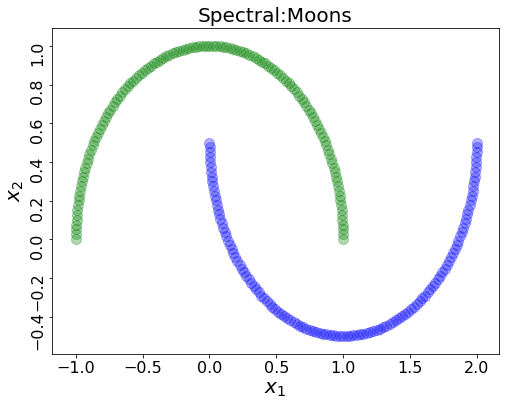

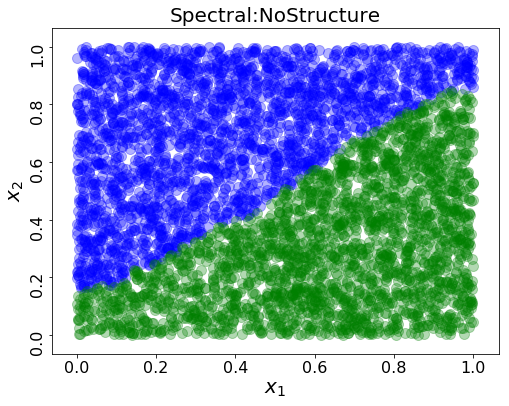

In [29]:


#Initialize Spectral Clustering
spectral = cluster.SpectralClustering(n_clusters=2,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors")
## Performing Spectral clustering

spectral.fit(Xcircles)

y_predict = spectral.labels_.astype(np.int)

spectral = cluster.SpectralClustering(n_clusters=3,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors")

spectral.fit(Yblobs)
yblob_predict = spectral.labels_.astype(np.int)

spectral = cluster.SpectralClustering(n_clusters=2,
                                      eigen_solver='arpack',
                                      affinity="nearest_neighbors")

spectral.fit(X_moon)
ymoon_predict =  spectral.labels_.astype(np.int)

spectral.fit(Yno_structure)
ynostruct_predict =  spectral.labels_.astype(np.int)

plot_scatter(Xcircles, labels1=y_predict, titles=["Spectral:Noisy Circles"])
plot_scatter(Yblobs, labels1=yblob_predict, titles=["Spectral:Blobs"])
plot_scatter(X_moon, labels1=ymoon_predict, titles=["Spectral:Moons"])
plot_scatter(Yno_structure, labels1=ynostruct_predict, titles=["Spectral:NoStructure"])

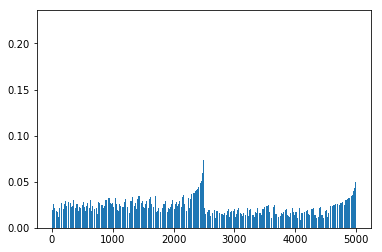

In [33]:

import pyclustering
from pyclustering.cluster.birch import birch
from pyclustering.cluster.optics import optics
from pyclustering.cluster.cure import cure
from pyclustering import cluster

from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

#Noisy circles

#optics function inputs are samples, eps, minpts
optics_instance = optics(Xcircles, 0.5, 6)
#run cluster analysis
optics_instance.process()

#obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

ordering = optics_instance.get_cluster_ordering()

indexes = [i for i in range(0, len(ordering))]
plt.bar(indexes, ordering);
plt.show()



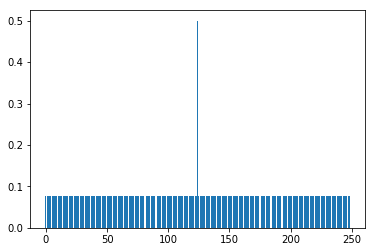

In [34]:
#Moon
#optics function inputs are samples, eps, minpts
optics_instance = optics(X_moon, 5, 6)
#run cluster analysis
optics_instance.process()

#obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

ordering = optics_instance.get_cluster_ordering()

indexes = [i for i in range(0, len(ordering))]
plt.bar(indexes, ordering);
plt.show()



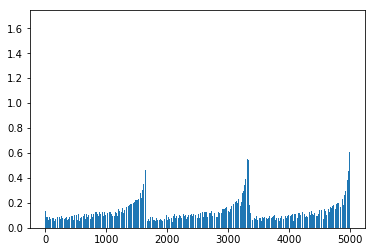

In [35]:
#Blobs
#optics function inputs are samples, eps, minpts
optics_instance = optics(Yblobs, 5, 6)
#run cluster analysis
optics_instance.process()

#obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

ordering = optics_instance.get_cluster_ordering()

indexes = [i for i in range(0, len(ordering))]
plt.bar(indexes, ordering);
plt.show()



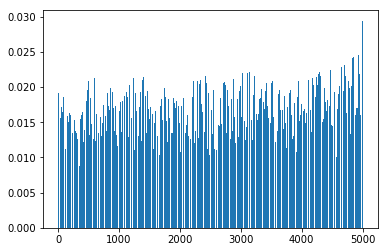

In [37]:
#Nostructures
#optics function inputs are samples, eps, minpts
optics_instance = optics(Yno_structure, 0.8, 6)
#run cluster analysis
optics_instance.process()

#obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()

ordering = optics_instance.get_cluster_ordering()

indexes = [i for i in range(0, len(ordering))]
plt.bar(indexes, ordering);
plt.show()


